<a href="https://colab.research.google.com/github/Elfeny7/ComputerVision_Learn/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ikmal Faris Musyaffa / 2141720123 / 12 / 3B**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## **Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas**


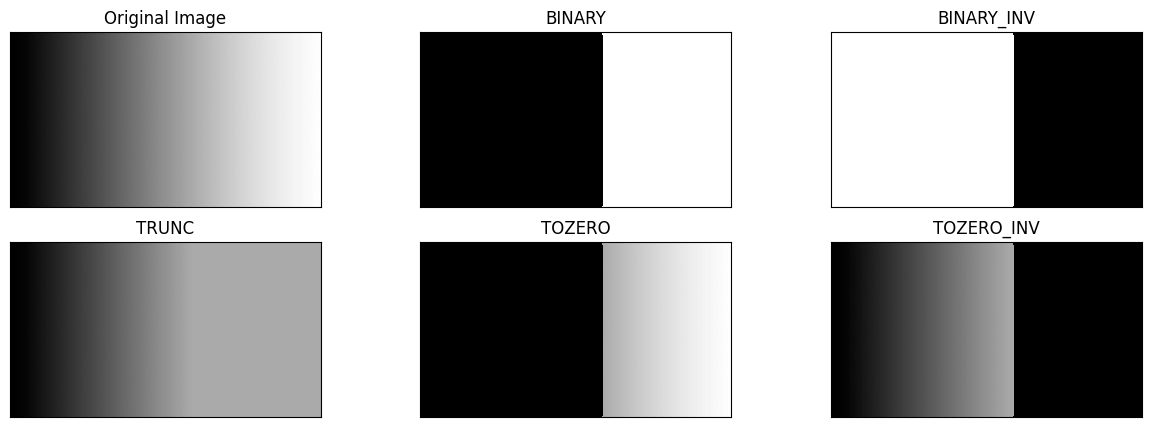

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/PCVK/Images/modul10/gradient.jpg')
img = cv.imread(filename)

thresh = 170 #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))

for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

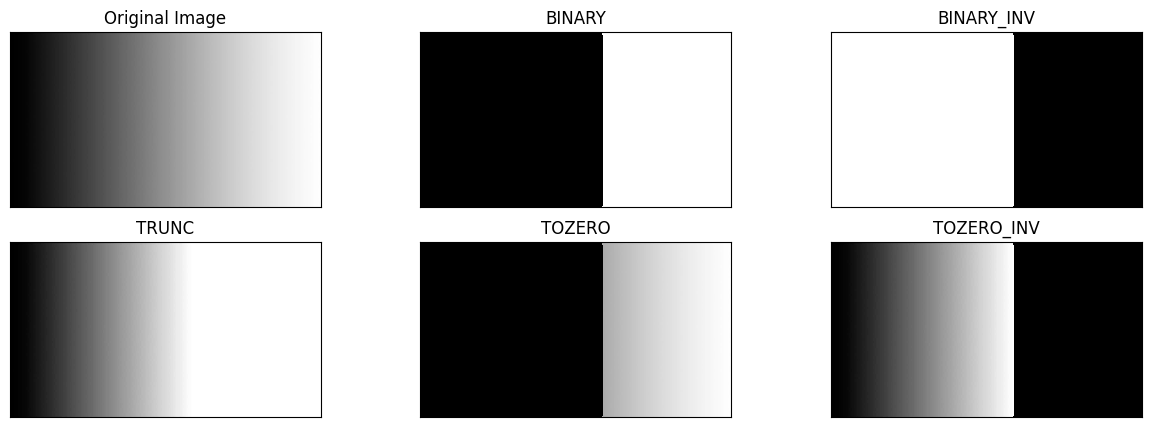

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
filename = '/content/drive/MyDrive/PCVK/Images/modul10/gradient.jpg'
img = cv.imread(filename, 0)  # Baca gambar sebagai grayscale

thresh = 170  # Nilai Threshold yang ditentukan

# Inisialisasi citra hasil dengan ukuran yang sama dengan citra masukan
thresh_binary = np.zeros_like(img)
thresh_binary_inv = np.zeros_like(img)
thresh_trunc = np.copy(img)  # Copy citra masukan untuk TRUNC
thresh_tozero = np.copy(img)  # Copy citra masukan untuk TOZERO
thresh_tozero_inv = np.copy(img)  # Copy citra masukan untuk TOZERO_INV

# Thresholding manual untuk berbagai jenis
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i, j] > thresh:
            thresh_binary[i, j] = 255  # BINARY
            thresh_binary_inv[i, j] = 0  # BINARY_INV
        else:
            thresh_binary[i, j] = 0
            thresh_binary_inv[i, j] = 255

        # TRUNC
        if img[i, j] > thresh:
            thresh_trunc[i, j] = thresh

        # TOZERO
        if img[i, j] <= thresh:
            thresh_tozero[i, j] = 0

        # TOZERO_INV
        if img[i, j] > thresh:
            thresh_tozero_inv[i, j] = 0

# Tampilkan citra-citra hasil
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh_binary, thresh_binary_inv, thresh_trunc, thresh_tozero, thresh_tozero_inv]
plt.figure(figsize=(15, 5))

for i in range(len(images)):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

## **Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)**

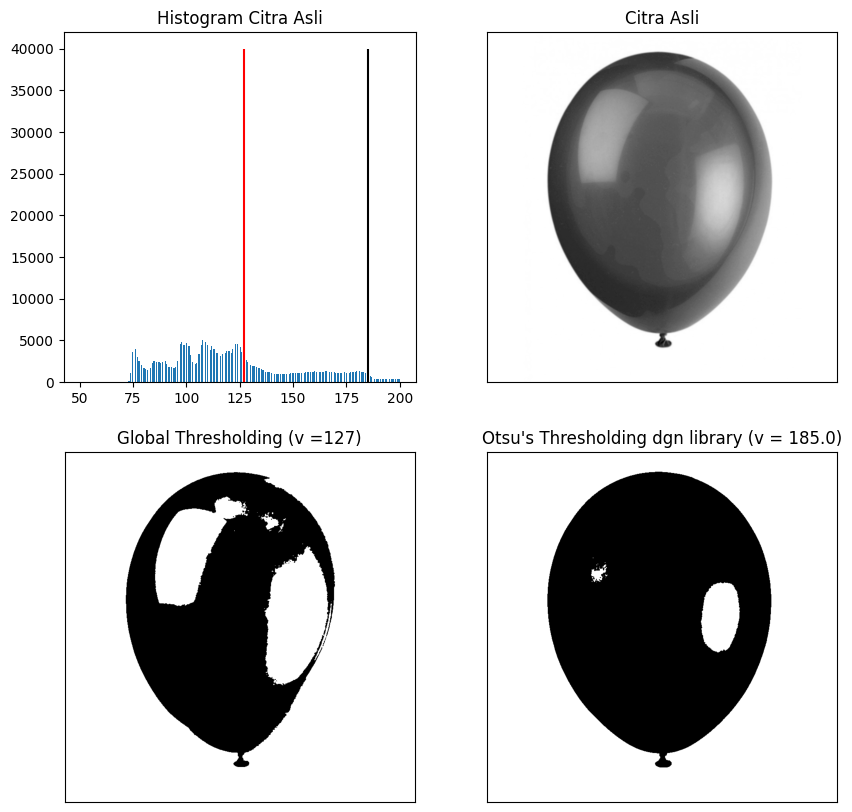

In [26]:
# Dengan Library
filename = '/content/drive/MyDrive/PCVK/Images/modul10/balloon.jpg'

img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v =' +str(thresh)+')', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's

plt.title('Histogram Citra Asli')

for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

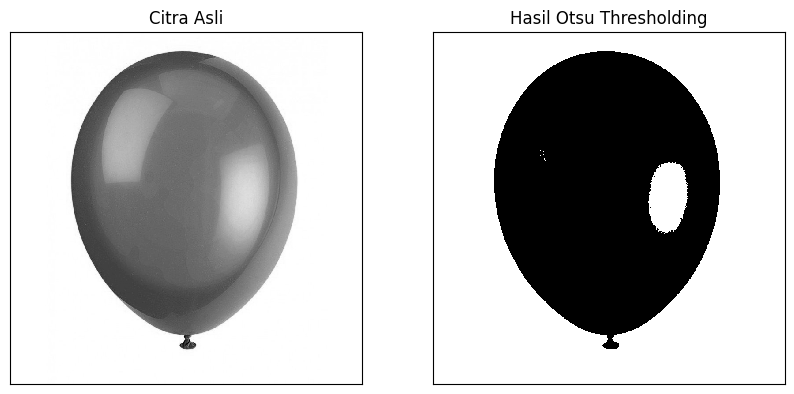

Ambang Otsu yang dihitung: 190


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Baca gambar
filename = '/content/drive/MyDrive/PCVK/Images/modul10/balloon.jpg'
image = Image.open(filename)
img = np.array(image)

# Konversi citra ke grayscale jika belum
if len(img.shape) == 3:
    img = np.mean(img, axis=2).astype(np.uint8)

# Hitung histogram citra
histogram = np.histogram(img, bins=256, range=(0, 256))[0]

# Total jumlah piksel dalam citra
total_pixels = img.size

# Inisialisasi variabel untuk menyimpan ambang Otsu
optimal_threshold = 0
max_between_class_var = 0

for threshold in range(256):
    # Probabilitas dalam kelas 1
    prob_class1 = np.sum(histogram[:threshold]) / total_pixels
    # Probabilitas dalam kelas 2
    prob_class2 = 1 - prob_class1

    # Rerata dalam kelas 1
    mean_class1 = np.sum(np.arange(threshold) * histogram[:threshold]) / (prob_class1 + 1e-5)
    # Rerata dalam kelas 2
    mean_class2 = np.sum(np.arange(threshold, 256) * histogram[threshold:]) / (prob_class2 + 1e-5)

    # Varian dalam kelas 1
    var_class1 = np.sum(((np.arange(threshold) - mean_class1) ** 2) * histogram[:threshold]) / (prob_class1 + 1e-5)
    # Varian dalam kelas 2
    var_class2 = np.sum(((np.arange(threshold, 256) - mean_class2) ** 2) * histogram[threshold:]) / (prob_class2 + 1e-5)

    # Varian antara kelas
    between_class_var = prob_class1 * prob_class2 * (mean_class1 - mean_class2) ** 2

    if between_class_var > max_between_class_var:
        max_between_class_var = between_class_var
        optimal_threshold = threshold

# Lakukan thresholding menggunakan ambang yang dihitung
thresholded_img = (img > optimal_threshold) * 255

# Tampilkan citra hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray', interpolation='nearest')
plt.title('Citra Asli')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(thresholded_img, cmap='gray', interpolation='nearest')
plt.title('Hasil Otsu Thresholding')
plt.xticks([]), plt.yticks([])

plt.show()

print("Ambang Otsu yang dihitung:", optimal_threshold)


## **Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images. Petunjuk: a. anda dapat gunakan cv.calcHist untuk menampilkan histogram. b. Buka link berikut https://opencv-tutorial.readthedocs.io/en/latest/histogram/histogram.html c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment)**

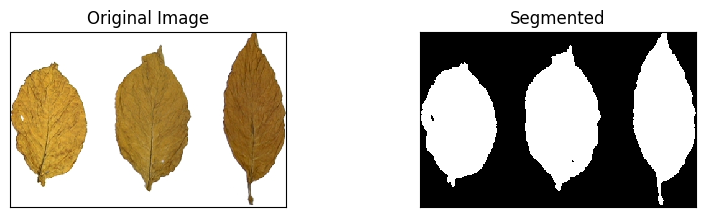

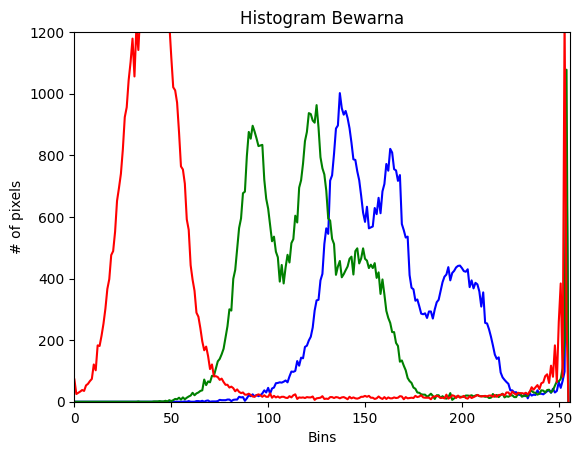

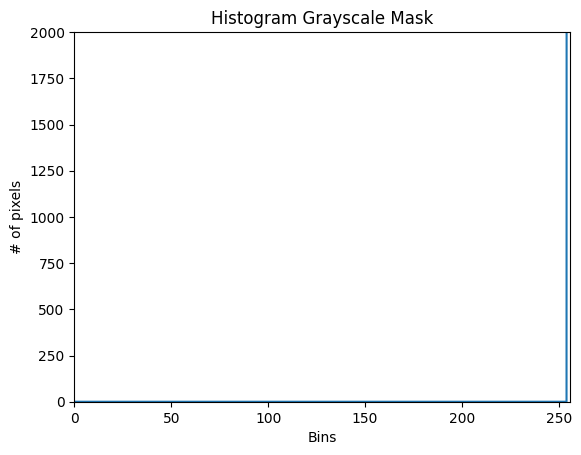

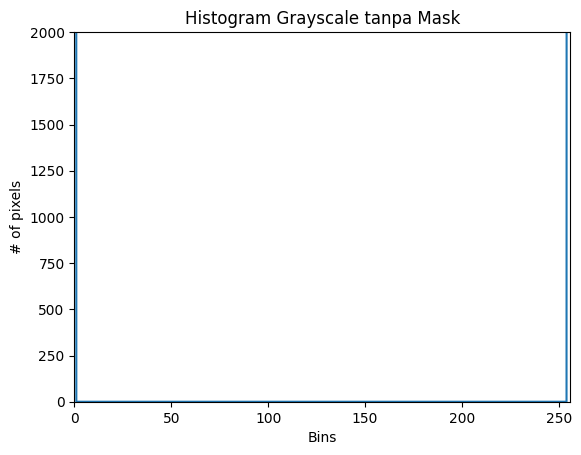

In [95]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/PCVK/Images/modul10/tobacco.jpg')
img = cv.imread(filename)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
thresh = 170
ret,thresh2 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY_INV)

mask = (thresh2 > 200).astype(np.uint8)
histo = cv.calcHist([thresh2], [0], mask, [256], [0, 256])
histoo = cv.calcHist([thresh2], [0], None, [256], [0, 256])

titles = ['Original Image','Segmented']
images = [img_rgb, thresh2]
plt.figure(figsize = (15,5))

#menampilkan histogram bewarna
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

chans = cv.split(img_rgb)
colors = 'b', 'g', 'r'

plt.figure()
plt.title('Histogram Bewarna')
plt.xlabel('Bins')
plt.ylabel('# of pixels')

for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0], None, [256], [0, 255])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, 1200])

plt.figure()
plt.title('Histogram Grayscale Mask')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(histo)
plt.xlim([0, 256])
plt.ylim([0, 2000])

plt.figure()
plt.title('Histogram Grayscale tanpa Mask')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(histoo)
plt.xlim([0, 256])
plt.ylim([0, 2000])


plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


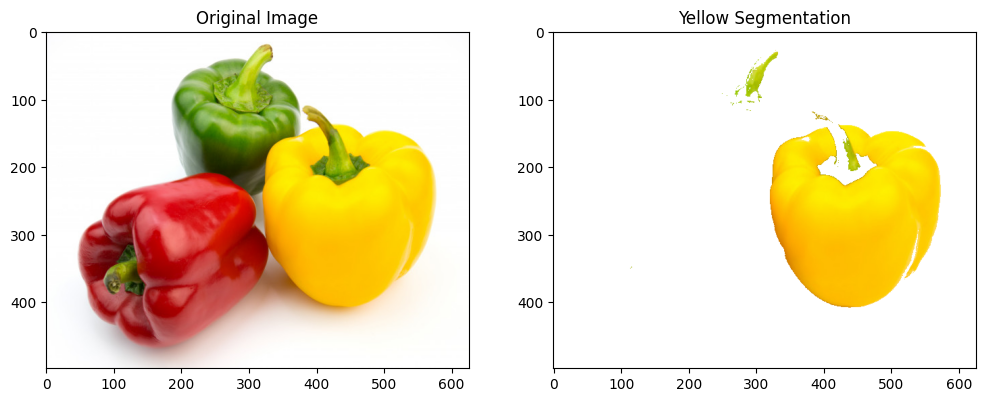

In [111]:
from sklearn.cluster import KMeans

# Load the image
image = cv.imread('/content/drive/MyDrive/PCVK/Images/modul10/peppers.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Convert the image to a 2D array of pixels
pixels = image_rgb.reshape((-1, 3))

# Define the number of clusters (in this case, for yellow color)
num_clusters = 5  # Adjust this value as needed

# Create the K-Means model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the model to the pixel data
kmeans.fit(pixels)

# Get the cluster centers (colors)
colors = kmeans.cluster_centers_

# Find the cluster that represents the yellow color
yellow_cluster = None
min_distance = float('inf')

for i, color in enumerate(colors):
    # Define a reference yellow color
    reference_yellow = np.array([255, 255, 0], dtype=np.uint8)

    # Calculate the Euclidean distance between the color and reference_yellow
    distance = np.linalg.norm(color - reference_yellow)

    if distance < min_distance:
        min_distance = distance
        yellow_cluster = i

# Create a mask for the yellow cluster
yellow_mask = (kmeans.labels_ == yellow_cluster)

# Reshape the mask to match the image dimensions
yellow_mask = yellow_mask.reshape(image.shape[0], image.shape[1])

# Create a white background image
white_background = np.full_like(image, (255, 255, 255), dtype=np.uint8)

# Apply the mask to the white background
output_image = np.where(yellow_mask[..., None], image, white_background)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image_rgb), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB)), plt.title('Yellow Segmentation')
plt.show()

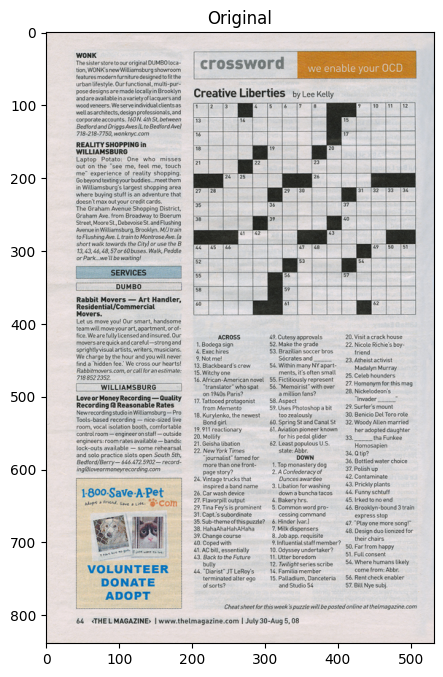

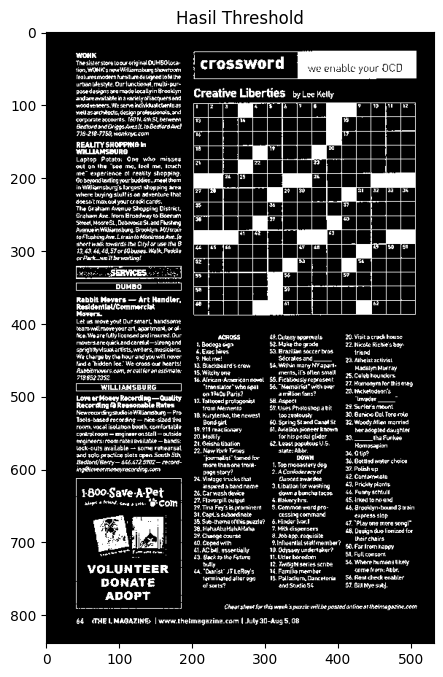

In [110]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('/content/drive/MyDrive/PCVK/Images/modul10/crossword.jpg')
img = cv.imread(filename)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
thresh = 170
ret,thresh1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (5,15))
plt.imshow(img_rgb)
plt.title('Original')

plt.figure(figsize = (5,15))
plt.imshow(thresh1, cmap='gray')
plt.title('Hasil Threshold')

plt.show()